<a href="https://colab.research.google.com/github/antonsysoev/comp_tech2025/blob/main/Lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Установка пакетов (если не установлены)
install.packages(c("tidyverse", "MASS", "ggplot2", "ggfortify", "caret"))

# Загрузка пакетов
library(tidyverse)
library(MASS)
library(ggplot2)
library(ggfortify)
library(caret)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘gridExtra’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following obj

In [ ]:
# Скачиваем датасет Iris с Kaggle (альтернативный способ)
# или используем встроенный датасет
data(iris)
df <- iris

# Просмотр структуры данных
head(df)
str(df)
summary(df)

# Проверка на пропущенные значения
sum(is.na(df))

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

[1] 0

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the ggfortify package.
  Please report the issue at <https://github.com/sinhrks/ggfortify/issues>.”


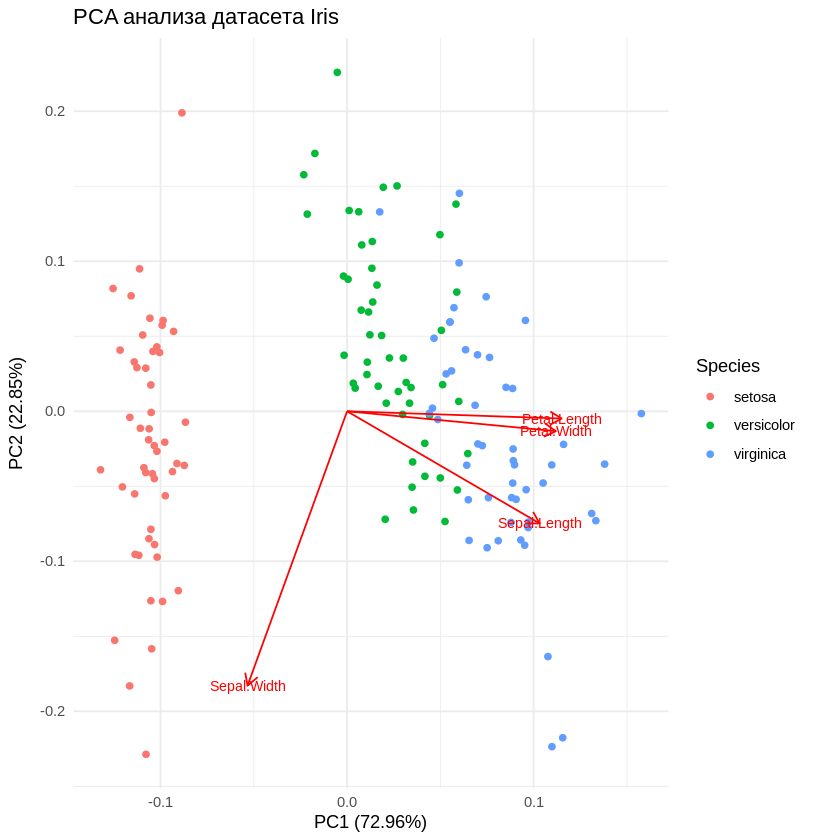

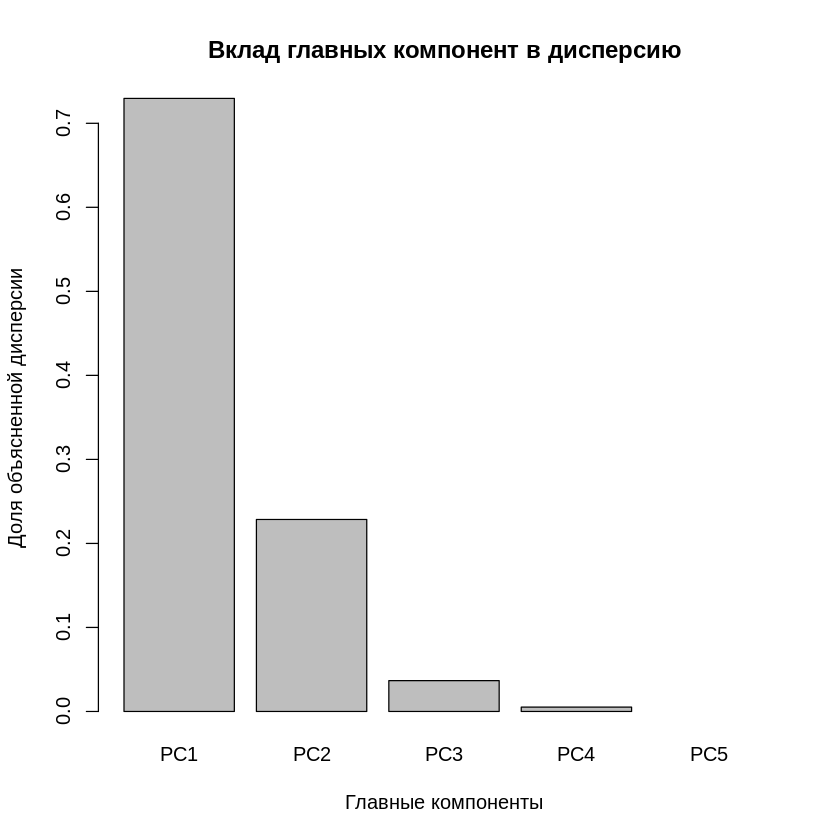

In [ ]:
# Подготовка данных для PCA (убираем категориальную переменную)
pca_data <- df[, -5]  # Убираем столбец Species

# Стандартизация данных
pca_data_scaled <- scale(pca_data)

# Выполнение PCA
pca_result <- prcomp(pca_data_scaled, center = TRUE, scale. = TRUE)

# Просмотр результатов PCA
summary(pca_result)
print(pca_result)

# Визуализация PCA
autoplot(pca_result, data = df, colour = 'Species',
         loadings = TRUE, loadings.label = TRUE,
         loadings.label.size = 3) +
  ggtitle("PCA анализа датасета Iris") +
  theme_minimal()

# Вклад каждой компоненты в дисперсию
pca_variance <- pca_result$sdev^2 / sum(pca_result$sdev^2)

# Визуализация вклада компонент
barplot(pca_variance[1:5],
        names.arg = paste0("PC", 1:5),
        main = "Вклад главных компонент в дисперсию",
        xlab = "Главные компоненты",
        ylab = "Доля объясненной дисперсии")

Call:
lda(Species ~ ., data = df)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.8293776 -0.02410215
Sepal.Width   1.5344731 -2.16452123
Petal.Length -2.2012117  0.93192121
Petal.Width  -2.8104603 -2.83918785

Proportion of trace:
   LD1    LD2 
0.9912 0.0088 


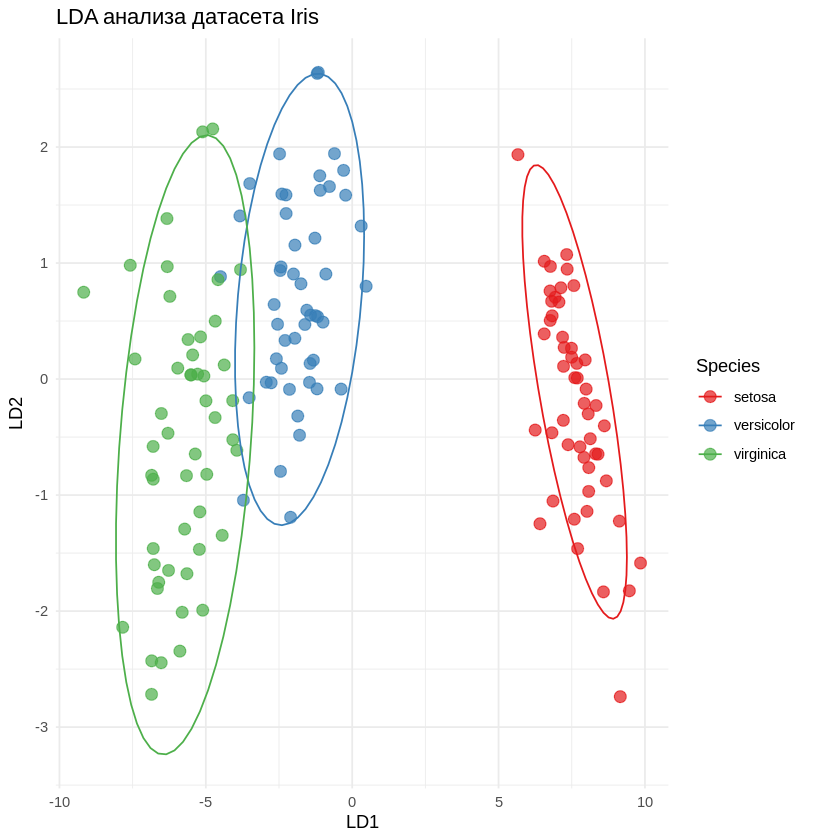

In [ ]:
# Выполнение LDA
lda_result <- lda(Species ~ ., data = df)

# Просмотр результатов LDA
print(lda_result)

# Предсказание с помощью LDA
lda_predict <- predict(lda_result, df)

# Создание датафрейма для визуализации
lda_df <- data.frame(
  LD1 = lda_predict$x[, 1],
  LD2 = lda_predict$x[, 2],
  Species = df$Species
)

# Визуализация LDA
ggplot(lda_df, aes(x = LD1, y = LD2, color = Species)) +
  geom_point(size = 3, alpha = 0.7) +
  stat_ellipse(level = 0.95) +
  ggtitle("LDA анализа датасета Iris") +
  theme_minimal() +
  scale_color_brewer(palette = "Set1")

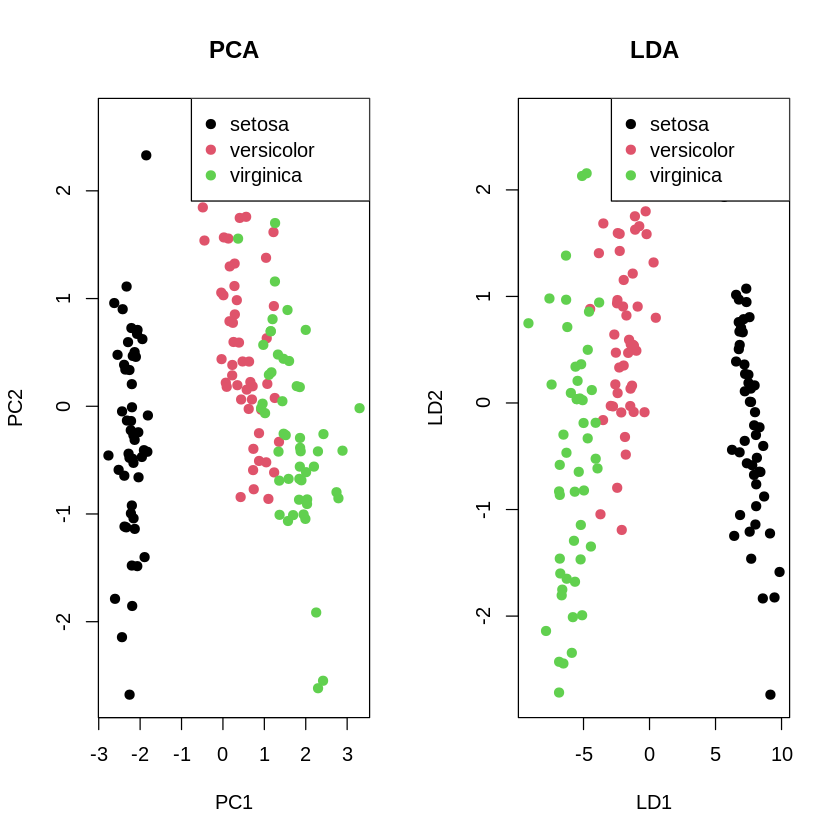

In [ ]:
# Создание комбинированного графика
par(mfrow = c(1, 2))

# PCA график
plot(pca_result$x[, 1], pca_result$x[, 2],
     col = as.numeric(df$Species), pch = 19,
     xlab = "PC1", ylab = "PC2",
     main = "PCA")
legend("topright", legend = levels(df$Species),
       col = 1:3, pch = 19)

# LDA график
plot(lda_predict$x[, 1], lda_predict$x[, 2],
     col = as.numeric(df$Species), pch = 19,
     xlab = "LD1", ylab = "LD2",
     main = "LDA")
legend("topright", legend = levels(df$Species),
       col = 1:3, pch = 19)

par(mfrow = c(1, 1))

In [ ]:
# Матрица ошибок
confusion_matrix <- table(df$Species, lda_predict$class)
print("Матрица ошибок:")
print(confusion_matrix)

# Точность классификации
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
cat("Точность LDA:", round(accuracy * 100, 2), "%\n")

[1] "Матрица ошибок:"
            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          1        49
Точность LDA: 98 %
